# Proyek Analisis Data: E-Commerce Dataset
- **Nama:** Helmy LuqmanulHakim
- **Email:** helmyl.work@gmail.com
- **ID Dicoding:** helmyl

## Menentukan Pertanyaan Bisnis

- How do delays in shipping (from carrier to customer) affect customer satisfaction (review scores)?
- Which regions experience the highest rate of delayed deliveries?
- What are the distinct customer segments based on their purchasing behavior, and how can these segments be used to improve marketing and customer retention?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [2]:
data_path: str = "data"
csv_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

print(f"Found {len(csv_files)} CSV files in {data_path} directory")

Found 9 CSV files in data directory


## Data Wrangling

### Gathering Data

In [3]:
orders: pd.DataFrame = pd.read_csv(os.path.join(data_path, "orders_dataset.csv"))
order_items: pd.DataFrame = pd.read_csv(
    os.path.join(data_path, "order_items_dataset.csv")
)
order_payments: pd.DataFrame = pd.read_csv(
    os.path.join(data_path, "order_payments_dataset.csv")
)
order_reviews: pd.DataFrame = pd.read_csv(
    os.path.join(data_path, "order_reviews_dataset.csv")
)
products: pd.DataFrame = pd.read_csv(os.path.join(data_path, "products_dataset.csv"))
sellers: pd.DataFrame = pd.read_csv(os.path.join(data_path, "sellers_dataset.csv"))
customers: pd.DataFrame = pd.read_csv(os.path.join(data_path, "customers_dataset.csv"))
geolocation: pd.DataFrame = pd.read_csv(
    os.path.join(data_path, "geolocation_dataset.csv")
)
product_category_name_translation: pd.DataFrame = pd.read_csv(
    os.path.join(data_path, "product_category_name_translation.csv")
)

### Assessing Data

In [4]:
print("Orders columns:", orders.columns)
print("Order Items columns:", order_items.columns)
print("Order Payments columns:", order_payments.columns)
print("Order Reviews columns:", order_reviews.columns)
print("Products columns:", products.columns)
print("Sellers columns:", sellers.columns)
print("Customers columns:", customers.columns)
print("Geolocation columns:", geolocation.columns)
print(
    "Product Category Name Translation columns:",
    product_category_name_translation.columns,
)

Orders columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Order Items columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Order Payments columns: Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Order Reviews columns: Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Products columns: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_wi

from that list of columns, we can re-design the erd, for doing merge and join operation.

#### Entity Relationship Diagram

[![](https://mermaid.ink/img/pako:eNqNlsFu4yAQhl_F8rl9gV67UrWnrbZ7jGRRmNgjYaAwTjab9t13sLHjONhNLhHMN8MM_AM-l9IqKJ9K8D9Q1F60O1Pw75dX4ENxHkbxF8ijqQsbDRWqG4PsAtk2bxucAgnqwsWoBAFhC8nsOi8bEaCKc8y2bhUVznl7AFUJWmUUaDyAZ0gK7zHOMHAPPhayyXOG2PKUGj1PM_5rZ2bb-JOgvW8r0dA4yz65neS6VScpZwqg9SLelHNo0DmGKo0t0qKyvbaCODLKm8m9B6wbqg5Cd9naXsWpBUP3l-cGhyrAR8f_KPRtjQmhk4O8MxrWh9b9yjd1JGY15d9wQDjmMva9ZV3Ay1oSH6T1sBZM2nYoBkl_C7Hug6hzohtBD4LQmjVtJkyYcOR8F400bcPrIKLcFmzoazRJXqy2rHcj2uX5JCRaKg2GpZMHFATp0fWlbHGusWRD9UGnW7kOxHEQaL1mj9GpqWS7BjRDgHXgiGoWYNrEt77dcnuYacRryz90Vbx2K-dhj3_XMInzsq9t8S5dqvs5XVy5nLZu58nWGeSm3ES-S30Cs8lP1lz6L2C1lb28MwXUF-t6EsPBzVE9fyEyZlNvrpStYg7kCknt9Zz65I_ndtRrdX3TVVtUxdLWGJrcJReKz8_HR3ueieKp2JXvoK2pQ0F2V-bo2XsVcWkNCb5sN-DpAYg8P98b6Hjx5shhzURP91Mk-YhjoEXGV_zYihHvXzpQxftp5Kdo19FzxxMDUBpzjEuO4wopxFyq0acfRAcaHS7bfpdL-VAy3ApU_CnWi4QTaYCVUEZYwV50uie_GBUd2beTkeUT-Q4eSm-7uhkHnYuvQfqYGya__gOjmlRZ?type=png)](https://mermaid.live/edit#pako:eNqNlsFu4yAQhl_F8rl9gV67UrWnrbZ7jGRRmNgjYaAwTjab9t13sLHjONhNLhHMN8MM_AM-l9IqKJ9K8D9Q1F60O1Pw75dX4ENxHkbxF8ijqQsbDRWqG4PsAtk2bxucAgnqwsWoBAFhC8nsOi8bEaCKc8y2bhUVznl7AFUJWmUUaDyAZ0gK7zHOMHAPPhayyXOG2PKUGj1PM_5rZ2bb-JOgvW8r0dA4yz65neS6VScpZwqg9SLelHNo0DmGKo0t0qKyvbaCODLKm8m9B6wbqg5Cd9naXsWpBUP3l-cGhyrAR8f_KPRtjQmhk4O8MxrWh9b9yjd1JGY15d9wQDjmMva9ZV3Ay1oSH6T1sBZM2nYoBkl_C7Hug6hzohtBD4LQmjVtJkyYcOR8F400bcPrIKLcFmzoazRJXqy2rHcj2uX5JCRaKg2GpZMHFATp0fWlbHGusWRD9UGnW7kOxHEQaL1mj9GpqWS7BjRDgHXgiGoWYNrEt77dcnuYacRryz90Vbx2K-dhj3_XMInzsq9t8S5dqvs5XVy5nLZu58nWGeSm3ES-S30Cs8lP1lz6L2C1lb28MwXUF-t6EsPBzVE9fyEyZlNvrpStYg7kCknt9Zz65I_ndtRrdX3TVVtUxdLWGJrcJReKz8_HR3ueieKp2JXvoK2pQ0F2V-bo2XsVcWkNCb5sN-DpAYg8P98b6Hjx5shhzURP91Mk-YhjoEXGV_zYihHvXzpQxftp5Kdo19FzxxMDUBpzjEuO4wopxFyq0acfRAcaHS7bfpdL-VAy3ApU_CnWi4QTaYCVUEZYwV50uie_GBUd2beTkeUT-Q4eSm-7uhkHnYuvQfqYGya__gOjmlRZ)

#### Merge and Join Operation

In [5]:
ecommerce = (
    orders.merge(order_items, on="order_id", how="left")
    .merge(order_payments, on="order_id", how="left")
    .merge(order_reviews, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(sellers, on="seller_id", how="left")
    .merge(customers, on="customer_id", how="left")
    .merge(
        geolocation,
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix",
        how="left",
    )
    .merge(product_category_name_translation, on="product_category_name", how="left")
)

In [6]:
foreign_keys = [
    "order_id",
    "product_id",
    "seller_id",
    "customer_id",
    "customer_zip_code_prefix",
    "geolocation_zip_code_prefix",
    "product_category_name",
]
ecommerce = ecommerce.drop(columns=foreign_keys)

In [7]:
ecommerce.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,...,seller_city,seller_state,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP,housewares
1,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.578333,-46.587123,sao paulo,SP,housewares
2,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP,housewares
3,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.575033,-46.587451,sao paulo,SP,housewares
4,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,2017-10-06 11:07:15,29.99,8.72,...,maua,SP,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.580054,-46.586673,sao paulo,SP,housewares


In [8]:
print("Duplicated rows:", ecommerce.duplicated().sum())

Duplicated rows: 5741145


wew that's a lot of duplicated row

In [9]:
missing_values = ecommerce.isnull().sum().to_frame("missing_values")
missing_values["missing_percentage"] = (
    missing_values["missing_values"] / ecommerce.shape[0] * 100
)

# let's display the missing values in descending order without duplicates rows
display(
    ecommerce.drop_duplicates()
    .describe(include="all")
    .T.join(missing_values)
    .sort_values("missing_percentage", ascending=False)
)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values,missing_percentage
review_comment_title,1393264,4527,Recomendo,50953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16154810,88.816578
review_comment_message,5176803,36159,Muito bom,24473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10703692,58.847197
order_delivered_customer_date,12102086,95664,2017-07-21 20:42:56,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,496943,2.732114
product_category_name_english,12183137,71,bed_bath_table,1297287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389565,2.141766
product_description_lenght,12185678.0,NaN,NaN,NaN,778.835111,645.983775,4.0,341.0,597.0,973.0,3992.0,385842,2.121298
product_photos_qty,12185678.0,NaN,NaN,NaN,2.191519,1.71202,1.0,1.0,1.0,3.0,20.0,385842,2.121298
product_name_lenght,12185678.0,NaN,NaN,NaN,48.747765,10.03878,5.0,42.0,52.0,57.0,76.0,385842,2.121298
order_delivered_carrier_date,12224542,81018,2017-07-14 19:25:34,9451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318246,1.749666
review_creation_date,12350538,636,2017-12-19 00:00:00,64574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143939,0.791354
review_answer_timestamp,12350538,98248,2017-08-07 20:16:08,9451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143939,0.791354


- We possibly to analyze/gathering insight by the review score, price, etc. But not for the product data(overall) and review comments.
- Because the missing values in the review score aren't too much, we can drop the row if the review score is missing.
- We can more focus on the review score, price, and product category.

### Cleaning Data

In [10]:
ecommerce = ecommerce.drop_duplicates()

In [11]:
ecommerce = ecommerce.dropna(subset=["review_score"])

In [12]:
dropped_columns = ["review_comment_title", "review_comment_message"]
ecommerce = ecommerce.drop(columns=dropped_columns)

In [13]:
missing_values = ecommerce.isnull().sum().to_frame("missing_values")
missing_values["missing_percentage"] = (
    missing_values["missing_values"] / ecommerce.shape[0] * 100
)

display(
    ecommerce.describe(include="all")
    .T.join(missing_values)
    .sort_values("missing_percentage", ascending=False)
)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values,missing_percentage
order_delivered_customer_date,12018562,95022,2017-07-21 20:42:56,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331976,2.687948
product_category_name_english,12089381,71,bed_bath_table,1284276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261157,2.114539
product_name_lenght,12091922.0,NaN,NaN,NaN,48.753783,10.037841,5.0,42.0,52.0,57.0,76.0,258616,2.093965
product_description_lenght,12091922.0,NaN,NaN,NaN,778.917427,645.925971,4.0,341.0,597.0,973.0,3992.0,258616,2.093965
product_photos_qty,12091922.0,NaN,NaN,NaN,2.192412,1.713207,1.0,1.0,1.0,3.0,20.0,258616,2.093965
order_delivered_carrier_date,12130777,80451,2017-07-14 19:25:34,9451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219761,1.779364
product_weight_g,12263633.0,NaN,NaN,NaN,2153.472693,3833.815097,0.0,300.0,700.0,1833.0,40425.0,86905,0.703654
product_length_cm,12263633.0,NaN,NaN,NaN,30.463833,16.348207,7.0,18.0,25.0,38.0,105.0,86905,0.703654
product_height_cm,12263633.0,NaN,NaN,NaN,16.696375,13.407157,2.0,8.0,13.0,20.0,105.0,86905,0.703654
product_width_cm,12263633.0,NaN,NaN,NaN,23.206799,11.814349,6.0,15.0,20.0,30.0,118.0,86905,0.703654


In [14]:
ecommerce[ecommerce["review_id"].duplicated(keep=False)].sort_values("review_id")

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,...,seller_city,seller_state,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name_english
2864973,delivered,2018-02-20 18:07:05,2018-02-20 18:20:44,2018-02-22 00:22:55,2018-03-19 14:34:39,2018-03-19 00:00:00,1.0,2018-02-28 18:20:44,145.00,15.76,...,guariba,SP,4ea3dd6fbcdc60a8ac2ee17617df1955,rio de janeiro,RJ,-22.919297,-43.554601,rio de janeiro,RJ,watches_gifts
2865002,delivered,2018-02-20 18:07:05,2018-02-20 18:20:44,2018-02-22 00:22:55,2018-03-19 14:34:39,2018-03-19 00:00:00,1.0,2018-02-28 18:20:44,145.00,15.76,...,guariba,SP,4ea3dd6fbcdc60a8ac2ee17617df1955,rio de janeiro,RJ,-22.908181,-43.364978,rio de janeiro,RJ,watches_gifts
2865001,delivered,2018-02-20 18:07:05,2018-02-20 18:20:44,2018-02-22 00:22:55,2018-03-19 14:34:39,2018-03-19 00:00:00,1.0,2018-02-28 18:20:44,145.00,15.76,...,guariba,SP,4ea3dd6fbcdc60a8ac2ee17617df1955,rio de janeiro,RJ,-22.904113,-43.366504,rio de janeiro,RJ,watches_gifts
2865000,delivered,2018-02-20 18:07:05,2018-02-20 18:20:44,2018-02-22 00:22:55,2018-03-19 14:34:39,2018-03-19 00:00:00,1.0,2018-02-28 18:20:44,145.00,15.76,...,guariba,SP,4ea3dd6fbcdc60a8ac2ee17617df1955,rio de janeiro,RJ,-22.902934,-43.354224,rio de janeiro,RJ,watches_gifts
2864998,delivered,2018-02-20 18:07:05,2018-02-20 18:20:44,2018-02-22 00:22:55,2018-03-19 14:34:39,2018-03-19 00:00:00,1.0,2018-02-28 18:20:44,145.00,15.76,...,guariba,SP,4ea3dd6fbcdc60a8ac2ee17617df1955,rio de janeiro,RJ,-22.904310,-43.366696,rio de janeiro,RJ,watches_gifts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983820,delivered,2017-10-18 12:20:20,2017-10-18 12:28:27,2017-10-21 16:46:53,2017-10-27 19:05:24,2017-11-08 00:00:00,1.0,2017-10-24 12:28:27,47.92,15.79,...,belo horizonte,MG,4df175730c8f2e007c28811903e84ad9,curitiba,PR,-25.467699,-49.277205,curitiba,PR,cool_stuff
10983819,delivered,2017-10-18 12:20:20,2017-10-18 12:28:27,2017-10-21 16:46:53,2017-10-27 19:05:24,2017-11-08 00:00:00,1.0,2017-10-24 12:28:27,47.92,15.79,...,belo horizonte,MG,4df175730c8f2e007c28811903e84ad9,curitiba,PR,-25.467501,-49.276274,curitiba,PR,cool_stuff
10983818,delivered,2017-10-18 12:20:20,2017-10-18 12:28:27,2017-10-21 16:46:53,2017-10-27 19:05:24,2017-11-08 00:00:00,1.0,2017-10-24 12:28:27,47.92,15.79,...,belo horizonte,MG,4df175730c8f2e007c28811903e84ad9,curitiba,PR,-25.471495,-49.275507,curitiba,PR,cool_stuff
10983826,delivered,2017-10-18 12:20:20,2017-10-18 12:28:27,2017-10-21 16:46:53,2017-10-27 19:05:24,2017-11-08 00:00:00,1.0,2017-10-24 12:28:27,47.92,15.79,...,belo horizonte,MG,4df175730c8f2e007c28811903e84ad9,curitiba,PR,-25.472431,-49.278813,curitiba,PR,cool_stuff


review_id were duplicated, maybe because system has some race condition, or the data were inserted twice.

In [15]:
print(f"Initial dataset shape: {ecommerce.shape}")

ecommerce = ecommerce.drop_duplicates(subset=["review_id"])

print(f"Final dataset shape: {ecommerce.shape}")

Initial dataset shape: (12350538, 36)
Final dataset shape: (98410, 36)


In [16]:
missing_values = ecommerce.isnull().sum().to_frame("missing_values")
missing_values["missing_percentage"] = (
    missing_values["missing_values"] / ecommerce.shape[0] * 100
)

display(
    ecommerce.describe(include="all")
    .T.join(missing_values)
    .sort_values("missing_percentage", ascending=False)
)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values,missing_percentage
order_delivered_customer_date,95601,94503,2018-05-14 20:02:44,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2809,2.854385
product_category_name_english,96262,71,bed_bath_table,9167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2148,2.182705
product_name_lenght,96283.0,NaN,NaN,NaN,48.850669,9.996448,5.0,42.0,52.0,57.0,76.0,2127,2.161366
product_description_lenght,96283.0,NaN,NaN,NaN,794.400091,654.952362,4.0,349.0,608.0,998.0,3992.0,2127,2.161366
product_photos_qty,96283.0,NaN,NaN,NaN,2.251945,1.748708,1.0,1.0,2.0,3.0,20.0,2127,2.161366
order_delivered_carrier_date,96697,80029,2018-05-09 15:48:00,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713,1.740677
product_weight_g,97668.0,NaN,NaN,NaN,2099.583886,3761.70378,0.0,300.0,700.0,1800.0,40425.0,742,0.753988
product_length_cm,97668.0,NaN,NaN,NaN,30.088545,16.119187,7.0,18.0,25.0,38.0,105.0,742,0.753988
product_height_cm,97668.0,NaN,NaN,NaN,16.477946,13.3181,2.0,8.0,13.0,20.0,105.0,742,0.753988
product_width_cm,97668.0,NaN,NaN,NaN,23.013648,11.734044,6.0,15.0,20.0,30.0,118.0,742,0.753988


## Visualization & Explanatory Analysis

### Pertanyaan 1: How do delays in shipping (from carrier to customer) affect customer satisfaction (review scores)?

/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/591667100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/591667100.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/59166710

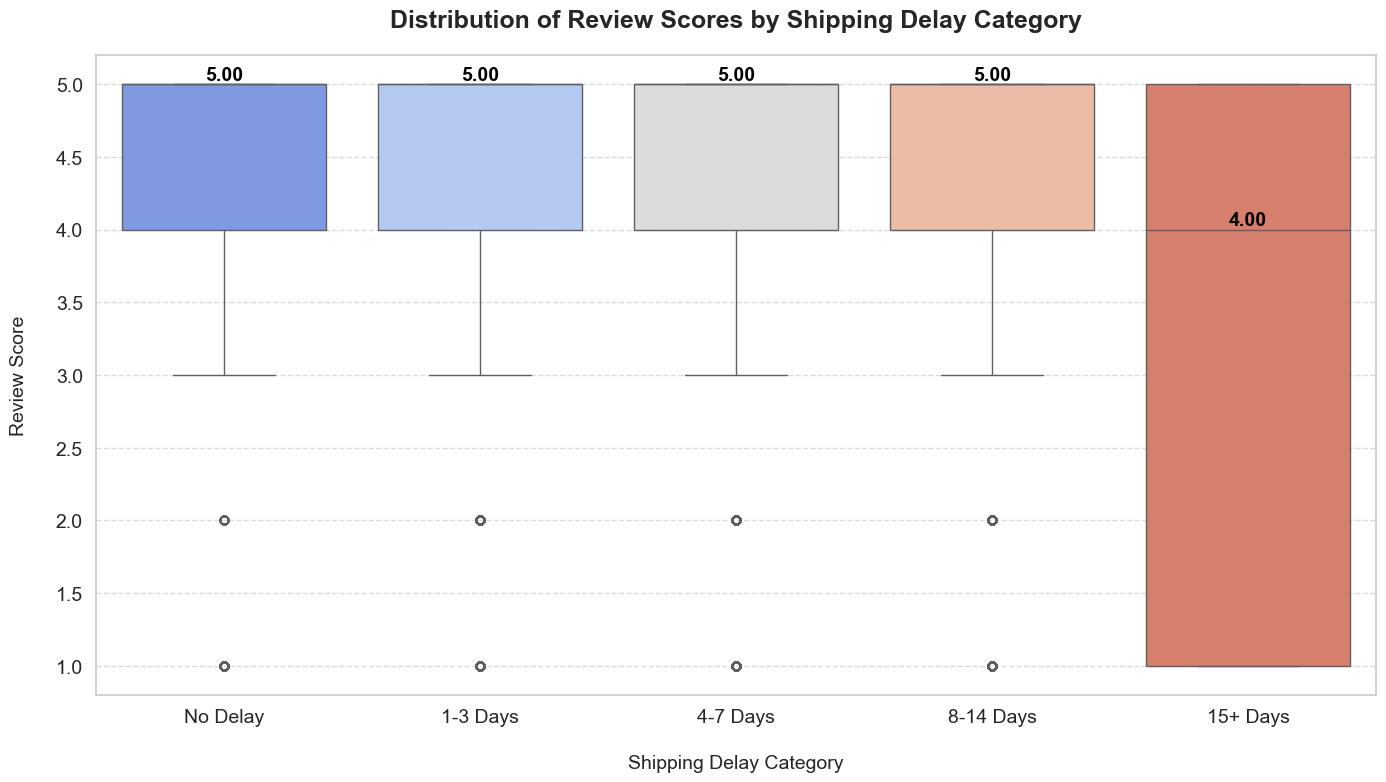

In [47]:
data = ecommerce[
    ["order_delivered_customer_date", "order_delivered_carrier_date", "review_score"]
]

data["order_delivered_customer_date"] = pd.to_datetime(
    data["order_delivered_customer_date"]
)
data["order_delivered_carrier_date"] = pd.to_datetime(
    data["order_delivered_carrier_date"]
)
data["delay_days"] = (
    data["order_delivered_customer_date"] - data["order_delivered_carrier_date"]
).dt.days

bins = [-1, 0, 3, 7, 14, float("inf")]
labels = ["No Delay", "1-3 Days", "4-7 Days", "8-14 Days", "15+ Days"]
data["delay_category"] = pd.cut(data["delay_days"], bins=bins, labels=labels)

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", len(labels))

sns.boxplot(x="delay_category", y="review_score", data=data, palette=palette)
plt.title(
    "Distribution of Review Scores by Shipping Delay Category",
    fontsize=18,
    weight="bold",
    pad=20,
)
plt.xlabel("Shipping Delay Category", fontsize=14, labelpad=20)
plt.ylabel("Review Score", fontsize=14, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

medians = data.groupby("delay_category")["review_score"].median()
for index, median in enumerate(medians):
    plt.text(
        index,
        median,
        f"{median:.2f}",
        ha="center",
        va="bottom",
        fontsize=14,
        color="black",
        weight="bold",
    )

plt.tight_layout(pad=4.0)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

plt.show()

### Pertanyaan 2: Which regions experience the highest rate of delayed deliveries?

/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/2992530416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/2992530416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/299253

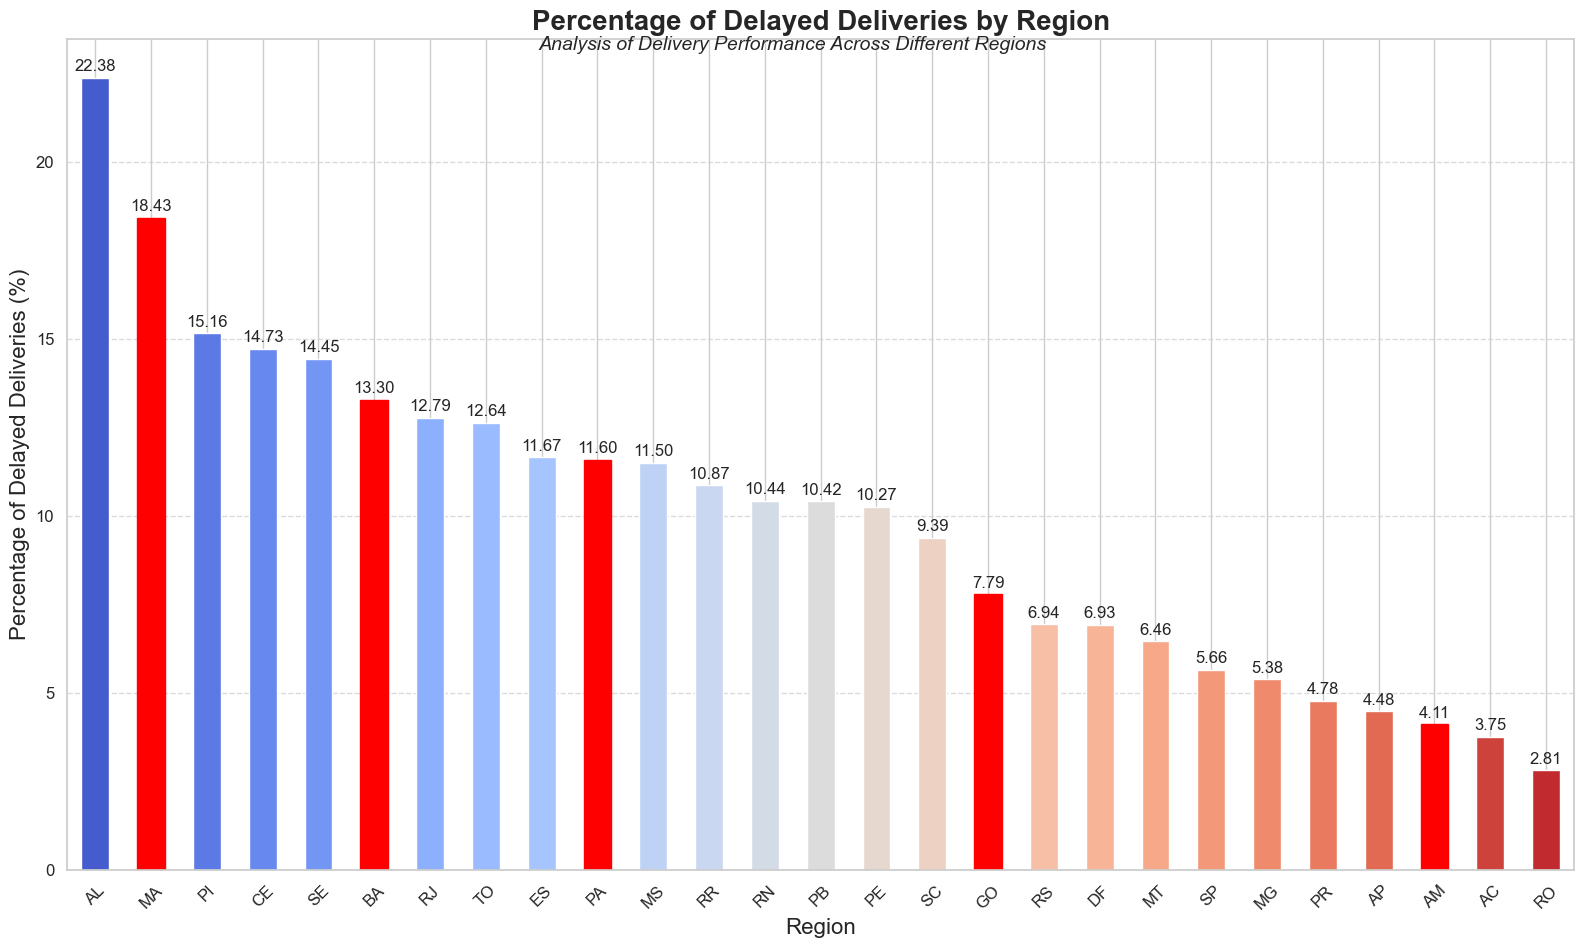

In [19]:
data = ecommerce[
    ["order_delivered_customer_date", "order_estimated_delivery_date", "customer_state"]
]

data["order_delivered_customer_date"] = pd.to_datetime(
    data["order_delivered_customer_date"]
)
data["order_estimated_delivery_date"] = pd.to_datetime(
    data["order_estimated_delivery_date"]
)
data["delayed"] = (
    data["order_delivered_customer_date"] > data["order_estimated_delivery_date"]
)

delay_by_region = data.groupby("customer_state")["delayed"].mean() * 100

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
bars = delay_by_region.sort_values(ascending=False).plot(
    kind="bar", color=sns.color_palette("coolwarm", len(delay_by_region))
)

plt.title("Percentage of Delayed Deliveries by Region", fontsize=20, weight="bold")
plt.suptitle(
    "Analysis of Delivery Performance Across Different Regions",
    fontsize=14,
    style="italic",
    y=0.92,
)
plt.xlabel("Region", fontsize=16)
plt.ylabel("Percentage of Delayed Deliveries (%)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars.patches:
    plt.annotate(
        format(bar.get_height(), ".2f"),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 8),
        textcoords="offset points",
    )

top_regions = delay_by_region.sort_values(ascending=False).head(5)
for region in top_regions.index:
    bars.patches[delay_by_region.index.get_loc(region)].set_color("red")

plt.tight_layout()
plt.show()

/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/2806301455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/2806301455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/280630

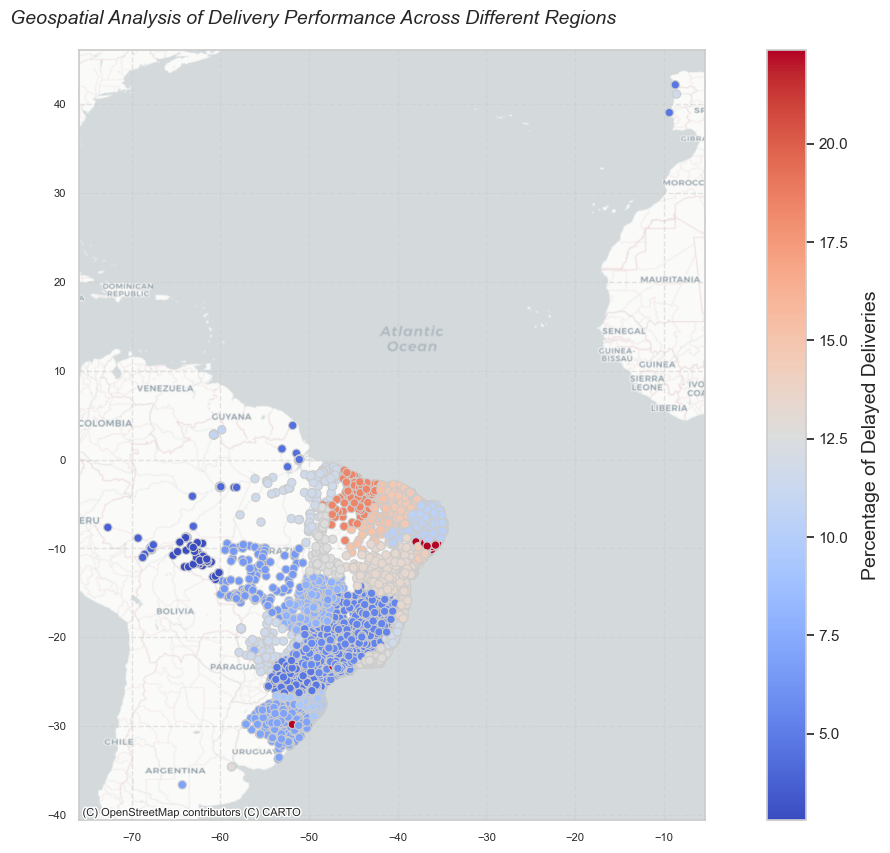

In [69]:
data = ecommerce[
    ["order_delivered_customer_date", "order_estimated_delivery_date", "customer_state"]
]
geolocation_data = ecommerce[
    ["geolocation_state", "geolocation_lng", "geolocation_lat"]
]

data["order_delivered_customer_date"] = pd.to_datetime(
    data["order_delivered_customer_date"]
)
data["order_estimated_delivery_date"] = pd.to_datetime(
    data["order_estimated_delivery_date"]
)
data["delayed"] = (
    data["order_delivered_customer_date"] > data["order_estimated_delivery_date"]
)

delay_by_region = data.groupby("customer_state")["delayed"].mean() * 100

geolocation_data = geolocation_data.dropna().drop_duplicates()
geolocation_data = geolocation_data.rename(
    columns={"geolocation_state": "customer_state"}
)
merged_data = geolocation_data.merge(delay_by_region, on="customer_state")

geometry = [
    Point(xy)
    for xy in zip(merged_data["geolocation_lng"], merged_data["geolocation_lat"])
]
gdf = gpd.GeoDataFrame(merged_data, geometry=geometry)

gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
gdf.plot(
    column="delayed",
    cmap="coolwarm",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=False,
)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

sm = plt.cm.ScalarMappable(
    cmap="coolwarm",
    norm=plt.Normalize(vmin=gdf["delayed"].min(), vmax=gdf["delayed"].max()),
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Percentage of Delayed Deliveries", fontsize=14, labelpad=10)

plt.suptitle(
    "Geospatial Analysis of Delivery Performance Across Different Regions",
    fontsize=14,
    style="italic",
    y=0.92,
)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.grid(True, linestyle="--", alpha=0.5)

plt.show()

### Pertanyaan 3: What are the distinct customer segments based on their purchasing behavior, and how can these segments be used to improve marketing and customer retention?

/var/folders/26/7kzhc1tn2j1d_6xzkz_nmpdc0000gn/T/ipykernel_4032/3444315553.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=rfm, x='cluster', order=rfm['cluster'].value_counts().index, palette='viridis')


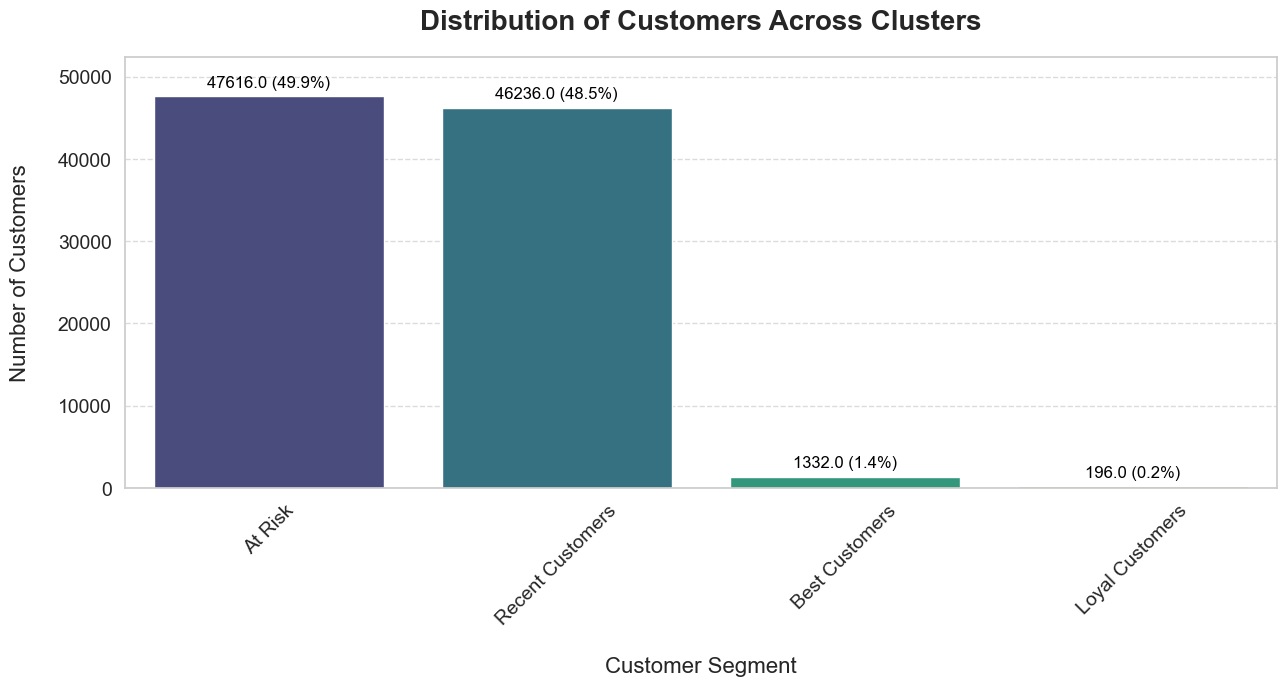

In [74]:
ecommerce["order_purchase_timestamp"] = pd.to_datetime(
    ecommerce["order_purchase_timestamp"]
)

rfm = (
    ecommerce.groupby("customer_unique_id")
    .agg(
        {
            "order_purchase_timestamp": lambda x: (
                ecommerce["order_purchase_timestamp"].max() - x.max()
            ).days,
            "customer_unique_id": "count",
            "payment_value": "sum",
        }
    )
    .rename(
        columns={
            "order_purchase_timestamp": "recency",
            "customer_unique_id": "frequency",
            "payment_value": "monetary",
        }
    )
)

recency_threshold = rfm["recency"].median()
frequency_threshold = rfm["frequency"].median()
monetary_threshold = rfm["monetary"].median()


def assign_cluster(row):
    if (
        row["recency"] <= recency_threshold
        and row["frequency"] > frequency_threshold
        and row["monetary"] > monetary_threshold
    ):
        return "Best Customers"
    elif row["recency"] <= recency_threshold and row["frequency"] > frequency_threshold:
        return "Loyal Customers"
    elif row["recency"] <= recency_threshold:
        return "Recent Customers"
    else:
        return "At Risk"


rfm["cluster"] = rfm.apply(assign_cluster, axis=1)

plt.figure(figsize=(14, 8))
ax = sns.countplot(
    data=rfm, x="cluster", order=rfm["cluster"].value_counts().index, palette="viridis"
)
plt.title(
    "Distribution of Customers Across Clusters", fontsize=20, weight="bold", pad=20
)
plt.xlabel("Customer Segment", fontsize=16, labelpad=20)
plt.ylabel("Number of Customers", fontsize=16, labelpad=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

total = len(rfm)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(
        f"{p.get_height()} ({percentage})",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )

ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(pad=4.0)
plt.show()

## Conclusion

#### **Pertanyaan 1**: How do delays in shipping (from carrier to customer) affect customer satisfaction (review scores)?

Based on the plot, we can draw the following conclusion about how shipping delays affect customer satisfaction as measured by review scores:
There appears to be a clear negative relationship between shipping delay length and customer satisfaction. The distribution of review scores remains consistently high (with a median of 5.0) for shipping delays up to 14 days. However, there is a noticeable drop in satisfaction for delays of 15 days or more:

For shipments with no delay or delays up to 14 days (categories: No Delay, 1-3 Days, 4-7 Days, 8-14 Days), the median review score is 5.0 across the board.
For shipments delayed 15+ days, the median review score drops to 4.0, a full point lower than all other categories.
While all categories show some lower outlier scores (indicated by dots at 1.0 and 2.0), the overall distribution remains higher for shorter delays.

This suggests that customers are generally tolerant of shipping delays up to two weeks, maintaining high satisfaction levels. However, once delays extend beyond 15 days, there's a significant negative impact on customer satisfaction. The data implies that keeping shipping times under 15 days is crucial for maintaining high customer review scores and satisfaction levels.
It's worth noting that factors beyond just the length of delay (e.g., communication, expectations set at purchase) may also influence these scores, but are not captured in this visualization.

#### **Pertanyaan 2**: Which regions experience the highest rate of delayed deliveries?

The regions experiencing the highest rates of delayed deliveries are:

- AL (Alagoas) - 22.38%
- MA (Maranhão) - 18.43%
- PI (Piauí) - 15.16%
- CE (Ceará) - 14.73%
- SE (Sergipe) - 14.45%

Based on the geospatial analysis map provided, we can observe that:

- The regions experiencing the highest rates of delayed deliveries are concentrated in the northeastern part of Brazil. This is indicated by the red and dark orange dots on the map.
- The states that appear to have the most severe delay issues likely include Alagoas, Pernambuco, Paraíba, Rio Grande do Norte, Ceará, and possibly parts of Maranhão and Piauí.
- The southern and southeastern regions of Brazil generally show lower rates of delayed deliveries, as indicated by the blue dots.



#### **Pertanyaan 3**: What are the distinct customer segments based on their purchasing behavior, and how can these segments be used to improve marketing and customer retention?

We can identify four distinct customer segments, based RFM Analysis (Recency, Frequency, Monetary Value):

- At Risk Customers (47,616): The largest segment, these customers haven't made a purchase recently and are at risk of churning.
- Recent Customers (46,236): The second-largest group, these customers have made purchases recently but haven't established a pattern of frequent buying.
- Best Customers (1,332): A smaller but valuable segment of customers who have made recent, frequent, and high-value purchases.
- Loyal Customers (196): The smallest segment, these customers make frequent purchases but may not spend as much as the "Best Customers."

To improve marketing and customer retention based on these segments:

1. At Risk Customers:
- Re-engagement campaigns with special offers or personalized product recommendations
- Surveys to understand why they haven't made recent purchases
- Targeted email campaigns highlighting new products or improvements
2. Recent Customers:
- Welcome series emails to nurture new relationships
- Cross-sell and upsell campaigns based on their initial purchases
- Loyalty program invitations to encourage repeat purchases
3. Best Customers:
- VIP treatment with exclusive offers, early access to new products, or special events
- Personalized communication and high-touch customer service
- Referral programs to leverage their positive experiences
4. Loyal Customers:
- Rewards for their consistent patronage
- Targeted campaigns to increase their purchase value
- Exclusive content or educational materials related to their interests

By leveraging these segments and implementing targeted strategies, the company can improve customer retention, increase customer lifetime value, and optimize marketing efforts for better ROI.

## Output the Cleaned Data

In [77]:
ecommerce.to_csv("dashboard/ecommerce.csv", index=False)